In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 



In [2]:
os.chdir("C:/Users/Debayan Chakraborty/Documents/Edwisor cab project")

In [3]:
os.getcwd()

'C:\\Users\\Debayan Chakraborty\\Documents\\Edwisor cab project'

In [4]:
train_data = pd.read_csv("train_cab.csv", sep = ",", encoding = "ISO-8859-1")
test_data = pd.read_csv("test.csv", sep = ",", encoding = "ISO-8859-1") 

In [5]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
train_data.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [7]:
test_data.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [8]:
train_data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [9]:
test_data

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [10]:
train_data.shape

(16067, 7)

In [11]:
test_data.shape

(9914, 6)

In [12]:
train_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
train_data.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [14]:
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [15]:
test_data.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
train_data.dropna(subset= ["pickup_datetime"]) 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [17]:
#Applying necessary data type conversions#

train_data['pickup_datetime'] =  pd.to_datetime(train_data['pickup_datetime'],errors ="coerce")

In [18]:
#Converting the pasenger count to factor/object #
train_data['passenger_count'] = train_data['passenger_count'].astype(object)

In [19]:
train_data.dtypes

fare_amount                       object
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                   object
dtype: object

In [20]:
sns.set()

In [21]:
%matplotlib inline


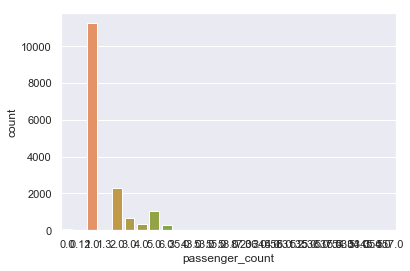

In [22]:
plt.figure
sns.countplot(x='passenger_count', data = train_data)

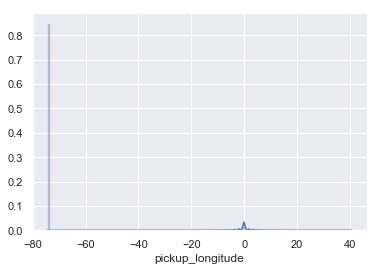

In [23]:
#From the above visualization it can be understood that there are numerous outlier present in the data#
#Hence we need to remove the unnecessary values and then proceed for data visualization#
##Meanwhile let us see some other visualizations to get some idea##

plt.figure
sns.distplot(train_data['pickup_longitude'], bins = 100)

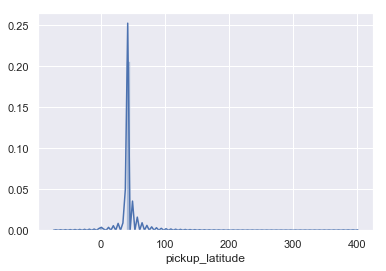

In [24]:
sns.distplot(train_data['pickup_latitude'], bins = 100)

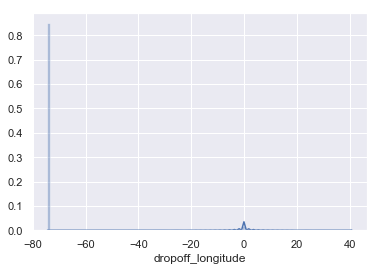

In [25]:
sns.distplot(train_data['dropoff_longitude'], bins = 100)

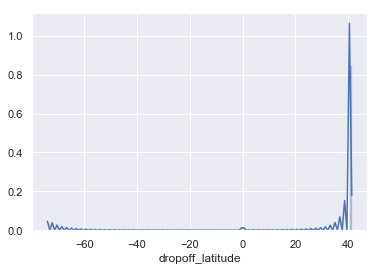

In [26]:
sns.distplot(train_data['dropoff_latitude'], bins = 100)

In [27]:
#Changing the datatype of fare_amount to float to obtain visualization#
train_data['fare_amount'] = pd.to_numeric(train_data['fare_amount'], errors = 'coerce')

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


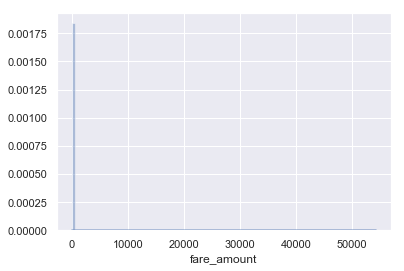

In [28]:
#Now applying the visualization on fareamount#
sns.distplot(train_data['fare_amount'], bins = 100)

In [29]:
#Missing value and outlier analysis#
#While creating the visualization for passenger_count we observed that there are many outliers present,
#hence we need to remove those outliers in following steps#

train_data['passenger_count']

0          1
1          1
2          2
3          1
4          1
5          1
6          1
7          1
8          1
9          2
10         1
11         3
12         2
13         1
14         2
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         3
26         1
27         3
28         1
29         2
        ... 
16037      1
16038      1
16039      5
16040      1
16041      1
16042      2
16043      2
16044      1
16045      2
16046      1
16047      1
16048      1
16049      4
16050      1
16051      2
16052      5
16053      1
16054      1
16055      1
16056      1
16057      6
16058      2
16059      3
16060      1
16061      1
16062      1
16063      2
16064      1
16065      1
16066    NaN
Name: passenger_count, Length: 16067, dtype: object

In [30]:
train_data['passenger_count'].sort_values (ascending = False)

1146      5345
293       5334
8985       557
971        554
8506       537
1200       536
356        535
8715     531.2
263        456
386        354
1107       345
233        236
8571        87
8445        58
413         55
8406        53
1007        53
1242        43
8631        43
1043        35
4592         6
5675         6
10840        6
13041        6
13129        6
4595         6
11636        6
1077         6
8171         6
4873         6
         ...  
734        NaN
773        NaN
788        NaN
842        NaN
899        NaN
941        NaN
1361       NaN
1399       NaN
1400       NaN
1459       NaN
1748       NaN
1790       NaN
1851       NaN
1921       NaN
1984       NaN
1987       NaN
2104       NaN
2230       NaN
2378       NaN
7787       NaN
7805       NaN
7847       NaN
7892       NaN
7937       NaN
8007       NaN
8076       NaN
8139       NaN
8259       NaN
8306       NaN
16066      NaN
Name: passenger_count, Length: 16067, dtype: object

In [31]:
train_data['passenger_count'].sort_values (ascending = True)

4248       0
8661       0
11803      0
3034       0
4344       0
5557       0
3413       0
13379      0
7520       0
4114       0
6575       0
3481       0
15554      0
13742      0
5058       0
13714      0
5161       0
5688       0
7640       0
15286      0
4354       0
5277       0
1160       0
14196      0
11462      0
5517       0
314        0
10642      0
9965       0
3489       0
        ... 
734      NaN
773      NaN
788      NaN
842      NaN
899      NaN
941      NaN
1361     NaN
1399     NaN
1400     NaN
1459     NaN
1748     NaN
1790     NaN
1851     NaN
1921     NaN
1984     NaN
1987     NaN
2104     NaN
2230     NaN
2378     NaN
7787     NaN
7805     NaN
7847     NaN
7892     NaN
7937     NaN
8007     NaN
8076     NaN
8139     NaN
8259     NaN
8306     NaN
16066    NaN
Name: passenger_count, Length: 16067, dtype: object

In [32]:
#By performing the sort operation we found that there are way too more extreme values that we imagined#
#By viewing the data on descending order we found there are few entries having value more than 6#
#By viewing the data on ascending order we found many entries having 0 value#
#Many NA values were also found#

train_data = train_data.drop(train_data[train_data['passenger_count']<1].index, axis=0)

In [33]:
train_data = train_data.drop(train_data[train_data['passenger_count']>6].index, axis=0)

In [34]:
train_data = train_data.drop(train_data[train_data['passenger_count'].isnull()].index, axis=0)

In [35]:
print(train_data['passenger_count'].isnull().sum())

0


In [36]:
train_data.shape

(15934, 7)

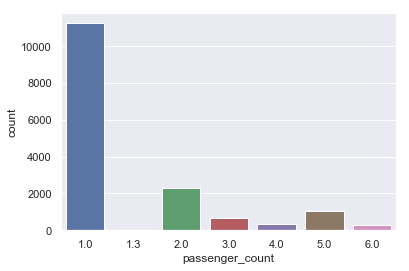

In [37]:
#Now we will plot the bar chart again after outlier removal#
plt.figure
sns.countplot(x='passenger_count', data = train_data)

In [38]:
#It seems there is an entry on value 1.3 tht we need to remove#
train_data = train_data.drop(train_data[train_data['passenger_count']== 1.3].index, axis=0)

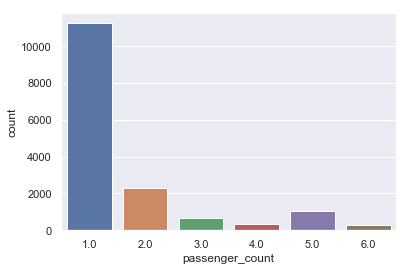

In [39]:
plt.figure
sns.countplot(x='passenger_count', data = train_data)

In [40]:
#Hurray now we have got a clear visualization without any outliers and missing values#

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'whiskers': [<matplotlib.lines.Line2D at 0xd13cd0eda0>,
 'caps': [<matplotlib.lines.Line2D at 0xd13cd9b7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0xd13cd0e828>],
 'medians': [<matplotlib.lines.Line2D at 0xd13cd9be80>],
 'fliers': [<matplotlib.lines.Line2D at 0xd13cd9bf98>],
 'means': []}

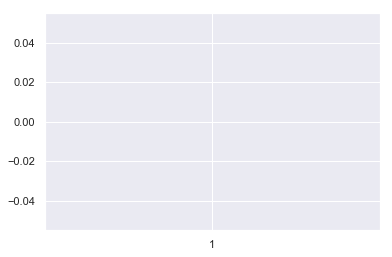

In [41]:
#Using boxplot for detrmining the outliers for rest of the variables#
%matplotlib inline
plt.boxplot(train_data['fare_amount'])

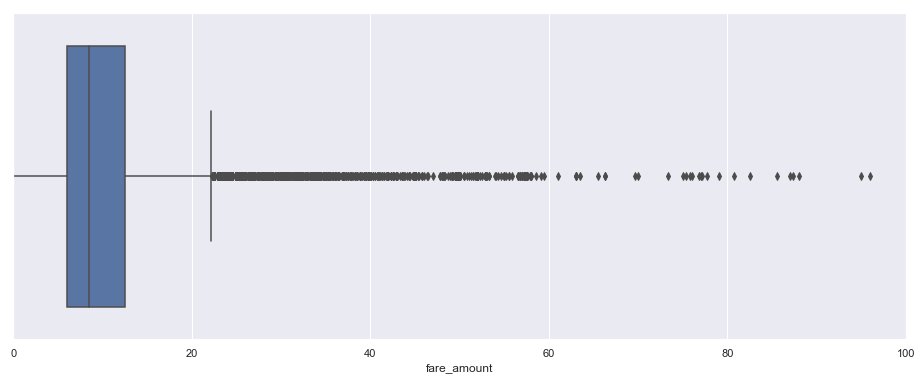

In [42]:
plt.figure(figsize=(16,6))
plt.xlim(0,100)
sns.boxplot(x=train_data['fare_amount'],data=train_data)

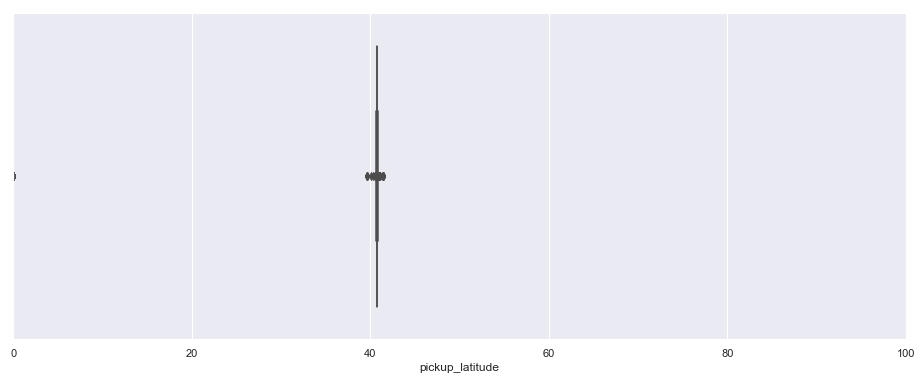

In [43]:
plt.figure(figsize=(16,6))
plt.xlim(0,100)
sns.boxplot(x=train_data['pickup_latitude'],data=train_data)

In [44]:
#########################################################################################
# We first tried to remove the outliers by the below formula of dropping outlier values#

#But it didn't turn out to be helpful as we still found outlers in our dataset#
#Hence we chose to manually remove the outliers in the dataset and not by following step#

#cnames = ["fare_amount","pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

#for i in cnames:
    
#   print (i)
#   q75, q25 = np.percentile(train_data.loc[:,i], [75 ,25])
#   print(q75,q25)
#   iqr = q75 - q25
#   min = q25 - (iqr*1.5)
#   max = q75 + (iqr*1.5)
#   print(min)
#   print(max)
#   train_data = train_data.drop(train_data[train_data.loc[:,i]<min].index)
#   train_data = train_data.drop(train_data[train_data.loc[:,i]>max].index)##
#############################################################################

#Outlier removal operation for re

In [45]:
train_data.isnull().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [46]:
!pip install fancyimpute
from fancyimpute import KNN
train_data = pd.DataFrame(KNN(k = 3).complete(train_data), columns = train_data.columns)

  Using cached https://files.pythonhosted.org/packages/d9/ed/90e0a13ad7ac4e7cdc2aeaefed26cebb4922f205bb778199268863fa2fbe/cvxpy-1.0.25.tar.gz
  Using cached https://files.pythonhosted.org/packages/b9/3a/59aa93b573a22fda44402383aeddcc2a081c31e61080af3da9d11855c77a/ecos-2.0.7.post1.tar.gz
  Using cached https://files.pythonhosted.org/packages/f2/6e/dbdd778c64c1920ae357a2013ea655d65a1f8b60f397d6e5549e4aafe8ec/scs-2.1.1-2.tar.gz
  Complete output from command D:\anaconda\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\DEBAYA~1\\AppData\\Local\\Temp\\pip-install-9utb3knj\\cvxpy\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\DEBAYA~1\AppData\Local\Temp\pip-wheel-rdr87gbj --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\cvxpy
  copying cvxpy\error

  Failed building wheel for cvxpy
  Failed building wheel for ecos
  Failed building wheel for scs
Command "D:\anaconda\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\DEBAYA~1\\AppData\\Local\\Temp\\pip-install-9utb3knj\\ecos\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\DEBAYA~1\AppData\Local\Temp\pip-record-ch95zjdb\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\DEBAYA~1\AppData\Local\Temp\pip-install-9utb3knj\ecos\


ModuleNotFoundError: No module named 'fancyimpute'

In [47]:
#Dropping NA values#
train_data = train_data.drop(train_data[train_data['fare_amount'].isnull()].index, axis=0)
train_data = train_data.drop(train_data[train_data['pickup_datetime'].isnull()].index, axis=0)

In [48]:
train_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [49]:
train_data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2
10,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1


In [50]:
train_data.shape

(15908, 7)

In [51]:
train_data['fare_amount']

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
5        12.1
6         7.5
7        16.5
9         8.9
10        5.3
11        5.5
12        4.1
13        7.0
14        7.7
15        5.0
16       12.5
17        5.3
18        5.3
19        4.0
20       10.5
21       11.5
22        4.5
23        4.9
24        6.1
25        7.3
27        4.5
28        9.3
29        4.5
30        5.5
32       31.9
         ... 
16036    10.5
16037     6.5
16038     5.7
16039    12.9
16040     6.5
16041    11.0
16042     8.5
16043     8.5
16044    16.5
16045     6.5
16046     6.0
16047     6.1
16048     9.7
16049    15.7
16050     8.5
16051    11.5
16052    10.0
16053     4.0
16054     5.3
16055    48.3
16056    38.3
16057     5.0
16058     5.5
16059     5.3
16060    22.0
16061    10.9
16062     6.5
16063    16.1
16064     8.5
16065     8.1
Name: fare_amount, Length: 15908, dtype: float64

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15908 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15908 non-null float64
pickup_datetime      15908 non-null datetime64[ns, UTC]
pickup_longitude     15908 non-null float64
pickup_latitude      15908 non-null float64
dropoff_longitude    15908 non-null float64
dropoff_latitude     15908 non-null float64
passenger_count      15908 non-null object
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 994.2+ KB


In [53]:
#For convinience splitting pickup_datetime variable#

train_data['year'] = train_data['pickup_datetime'].dt.year
train_data['Month'] = train_data['pickup_datetime'].dt.month
train_data['Date'] = train_data['pickup_datetime'].dt.day
train_data['Day'] = train_data['pickup_datetime'].dt.dayofweek
train_data['Hour'] = train_data['pickup_datetime'].dt.hour
train_data['Minute'] = train_data['pickup_datetime'].dt.minute

In [54]:
train_data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                   object
year                               int64
Month                              int64
Date                               int64
Day                                int64
Hour                               int64
Minute                             int64
dtype: object

In [55]:
#Replicating the same in test dataset too#

test_data['pickup_datetime'] =  pd.to_datetime(test_data['pickup_datetime'],errors ="coerce")

In [56]:
test_data['year'] = test_data['pickup_datetime'].dt.year
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Date'] = test_data['pickup_datetime'].dt.day
test_data['Day'] = test_data['pickup_datetime'].dt.dayofweek
test_data['Hour'] = test_data['pickup_datetime'].dt.hour
test_data['Minute'] = test_data['pickup_datetime'].dt.minute

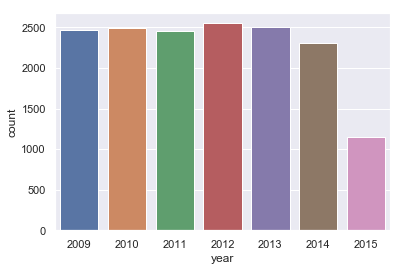

In [57]:
#fetching the visualizations for year, month, day, dayofweek, hourly basis#

plt.figure
sns.countplot(train_data['year']) 


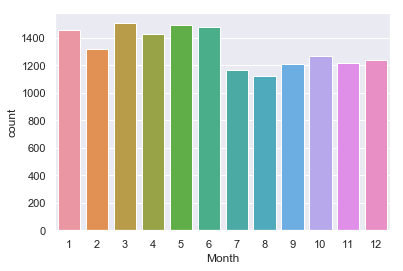

In [58]:
plt.figure
sns.countplot(train_data['Month']) 

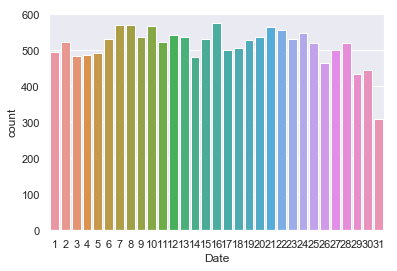

In [59]:
plt.figure
sns.countplot(train_data['Date'])

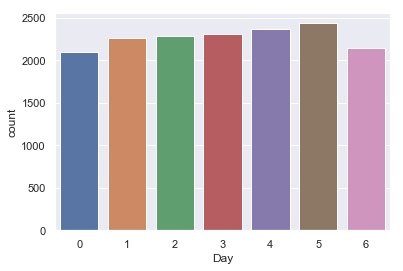

In [60]:
plt.figure
sns.countplot(train_data['Day'])

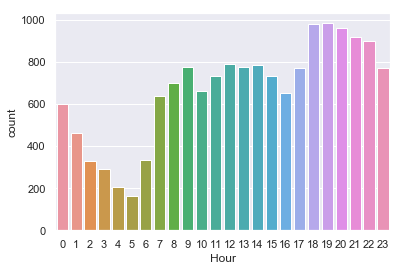

In [61]:
plt.figure
sns.countplot(train_data['Hour'])

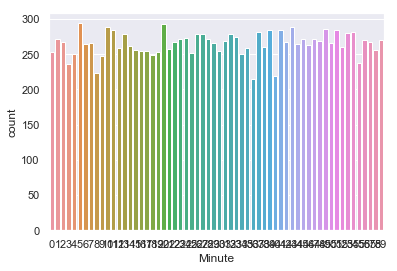

In [62]:
plt.figure
sns.countplot(train_data['Minute'])

In [63]:
test_data.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Text(0, 0.5, 'Fare')

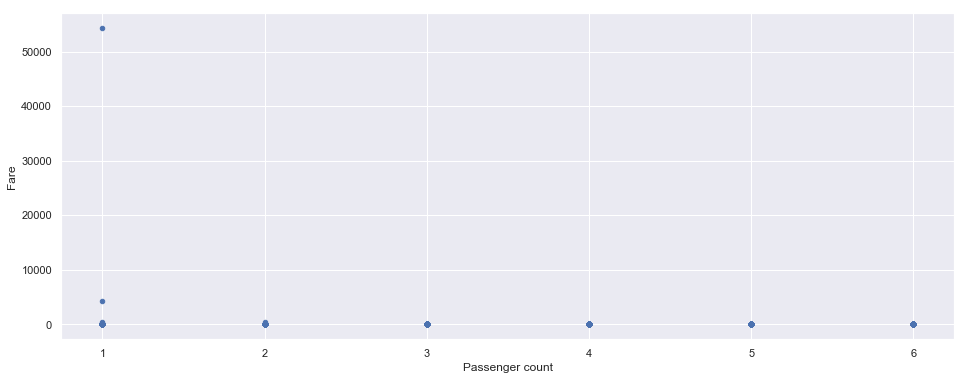

In [64]:
#Since our datasets are clean now we can obtain visualization to determine the relationship among key variables#
plt.figure(figsize=(16,6))
plt.scatter(x=train_data['passenger_count'], y=train_data['fare_amount'], s=20)
plt.xlabel('Passenger count')
plt.ylabel('Fare')

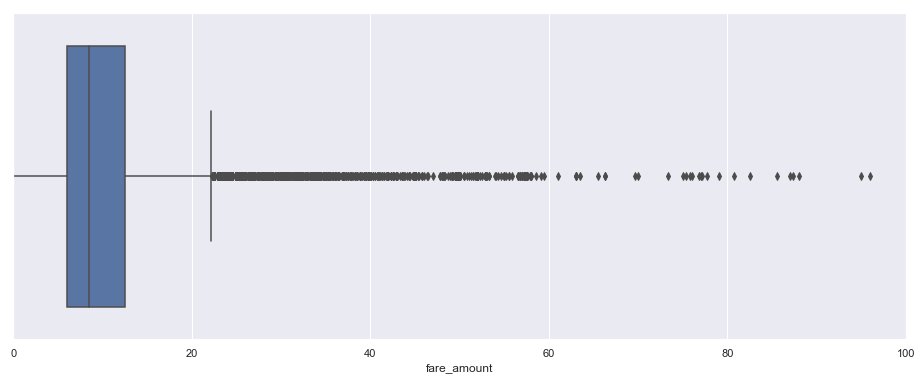

In [65]:
plt.figure(figsize=(16,6))
plt.xlim(0,100)
sns.boxplot(x=train_data['fare_amount'],data=train_data)

In [66]:
#It seems the fareamount still contains outliers#
#Lets check again#

train_data["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
9621         2.50
15370        2.50
8547         2.50
8596         2.50
4058         2.50
503          2.50
8603         2.50
6703         2.50
8680         2.50
6632         2.50
8711         2.50
8795         2.50
15490        2.50
4084         2.50
14304        2.50
12705        2.50
12598        2.50
9177         2.50
12567        2.50
6297         2.50
15257        2.50
6276         2.50
6226         2.50
7408         2.50
1427      

In [67]:
#We can see some absurd values as high as 50k and some negetive values too#
#we need to eliminate these outliers#

train_data = train_data.drop(train_data[train_data["fare_amount"]<1].index, axis=0)

In [68]:
train_data = train_data.drop(train_data[train_data["fare_amount"]>453].index, axis=0)

In [69]:
train_data["fare_amount"].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
12915     96.00
7810      95.00
9431      88.00
10077     87.30
12614     87.00
4620      85.50
14519     82.50
12437     80.75
2639      79.00
4013      77.70
13962     77.15
2013      77.00
6668      76.80
8363      76.00
10524     75.80
11019     75.33
13615     75.00
15023     73.30
1494      70.00
4118      69.70
649       66.30
9651      66.30
1709      65.50
          ...  
6703       2.50
15257      2.50
12705      2.50
10458      2.50
8263       2.50
1774       2.50
13488      2.50
3558       2.50
1750       2.50
15490      2.50
1419       2.50
10111      2.50
503        2.50
8711       2.50
6765       2.50
5449       2.50
12178      2.50
14530      2.50
8680       2.50
4084       2.50
12343      2.50
9773       2.50
4058       2.50
8603       2.50
12567      2.50
8596       2.50
13221      2.50
13571      2.50
8547       2.50
1427       1.14
Name: fare_amount, Lengt

Text(0, 0.5, 'Fare')

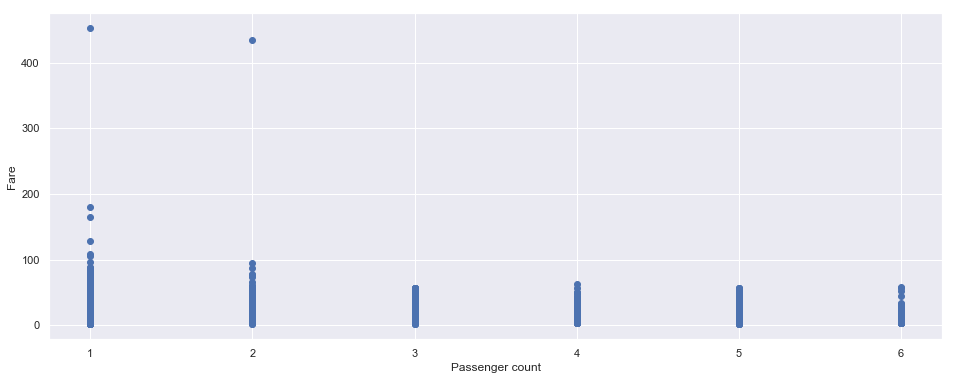

In [70]:
#Now we are hopeful of generating proper visualization#
plt.figure(figsize=(16,6))
plt.scatter(x=train_data['passenger_count'], y=train_data['fare_amount'])
plt.xlabel('Passenger count')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

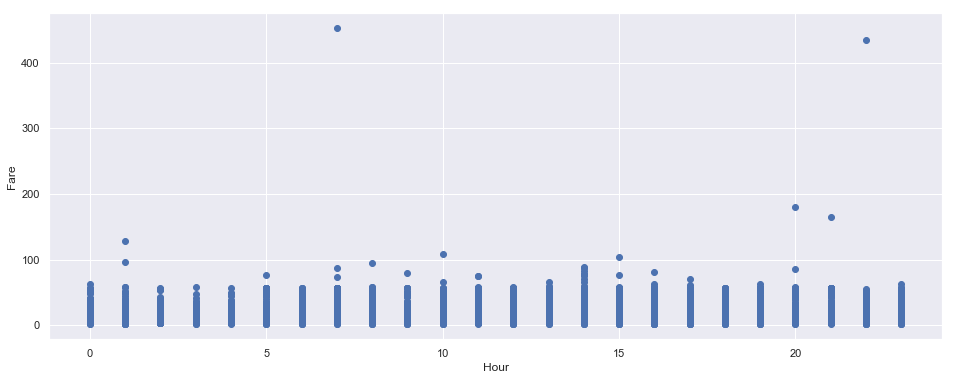

In [71]:
plt.figure(figsize=(16,6))
plt.scatter(x=train_data['Hour'], y=train_data['fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

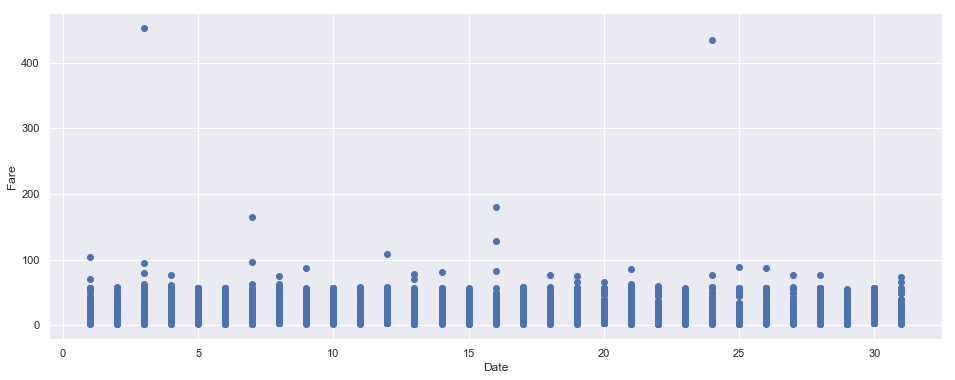

In [72]:
plt.figure(figsize=(16,6))
plt.scatter(x=train_data['Date'], y=train_data['fare_amount'])
plt.xlabel('Date')
plt.ylabel('Fare')

In [73]:
#Feature engineering with longitude and latitude values#
#The longitude and latitude values should be put to usable data which we can understand and interpret# 
#Now we will use the haversine formula to calculate distance with longitude and latitude values#

from math import radians, cos, sin, asin, sqrt

In [74]:
def haversine(k):
    plong=k[0]
    plat=k[1]
    dlong=k[2]
    dlat=k[3]
    
    plong, plat, dlong, dlat = map(radians, [plong, plat, dlong, dlat])
    del_lambda = dlong - plong
    del_phi = plat - dlat 
    h = sin(del_phi/2)**2 + cos(plat) * cos(dlat) * sin(del_lambda/2)**2
    distance = 2 * asin(sqrt(h))
    kms = 6371 * distance
    return kms


In [75]:
train_data['range'] = train_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [76]:
test_data['range'] = test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [77]:
train_data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,range
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,9,50,3.787239
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1,20,35,1.555807
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2,17,22,4.155444
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,1,11,2.849627
10,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,8,6,7,30,1.374577


In [78]:
test_data

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,range
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301
5,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,1,5,21,12,3.222549
6,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,3,12,10,0.929601
7,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1,2011,10,6,3,12,10,21.540102
8,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1,2011,10,6,3,12,10,3.873962
9,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1,2014,2,18,1,15,22,1.099794


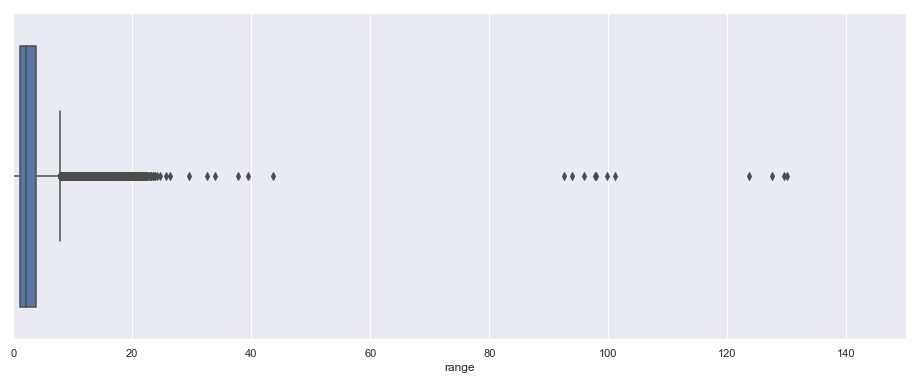

In [79]:
#Checking outliers in range#
plt.figure(figsize=(16,6))
plt.xlim(0,150)
sns.boxplot(x=train_data['range'],data=train_data)


In [80]:
#too many outlers in range#
train_data["range"].sort_values(ascending=False)


9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
10964       0.000000
7280        0.000000
13037       0.000000
2722        0.000000
13045       0.000000
13050       0.000000
8331        0.000000
1630        0.000000
13062       0.000000
1637        0.000000
13677       0.000000
13015       0.000000
13013       0.000000
4454        0.000000
4461        0.000000
9863        0.000000
1542        0

In [81]:
train_data = train_data.drop(train_data[train_data['range']== 0].index, axis=0)

In [82]:
train_data["range"].sort_values(ascending=True)

15490       0.000111
13582       0.000202
15366       0.000238
510         0.000279
13488       0.000344
8263        0.000476
15093       0.000789
4861        0.000848
3558        0.000951
10611       0.001960
8596        0.002173
8603        0.002232
15370       0.002234
10258       0.002235
616         0.002507
8734        0.002616
4058        0.002687
9012        0.002693
1494        0.002733
9928        0.002838
14475       0.002842
5593        0.003054
14633       0.003069
3645        0.003173
8371        0.003434
184         0.003982
14530       0.004059
15530       0.004709
8773        0.004829
6002        0.004982
            ...     
3075       97.985088
1684       99.771579
5663      101.094619
12228     123.561157
11619     127.509261
14536     129.560455
10710     129.950482
7014     4447.086698
5864     5420.988959
2280     6026.494216
15749    6028.926779
15783    8656.714168
14197    8657.136619
12705    8661.362152
6302     8663.039123
12983    8664.131808
6188     8664

In [83]:
train_data = train_data.drop(train_data[train_data['range']< 0.1].index, axis=0)

In [84]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,Month,Date,Day,Hour,Minute,range
count,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000
mean,11.348474,-73.869937,40.692723,-73.859843,40.669802,2011.741255,6.272165,15.672790,3.035828,13.502834,29.652791,15.613524
std,10.543482,3.148628,3.956018,3.248466,2.680028,1.869875,3.446859,8.687711,1.970041,6.505461,17.307131,317.264729
min,1.140000,-74.438233,-74.006893,-74.227047,-73.994392,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.100688
25%,6.000000,-73.992385,40.736553,-73.991363,40.736289,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.296622
50%,8.500000,-73.982053,40.753320,-73.980558,40.754217,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.210491
75%,12.500000,-73.968149,40.767799,-73.965497,40.768311,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.968354
max,453.000000,40.766125,401.083332,40.802437,41.366138,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,8667.542104


In [85]:
train_data["range"].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
12492       0.182329
13692       0.181373
11556       0.179601
11952       0.176871
3847        0.165783
2118        0.163978
8196        0.157444
222         0.153822
15482       0.148980
6497        0.144335
4617        0.143273
9203        0.141834
10109       0.139252
3876        0.137802
11234       0.135342
3427        0.134988
4982        0

In [86]:
train_data = train_data.drop(train_data[train_data['range'] > 150 ].index, axis=0)

In [87]:
train_data["range"].sort_values(ascending=False)

10710    129.950482
14536    129.560455
11619    127.509261
12228    123.561157
5663     101.094619
1684      99.771579
3075      97.985088
9899      97.670590
4487      95.852036
9808      93.925599
7401      92.605848
12349     43.648755
649       39.476975
6308      37.812945
5686      33.850093
4118      32.602535
7021      29.478280
6677      26.369072
4567      25.735917
8105      24.690884
15023     24.125745
15178     23.814940
14099     23.696200
12433     23.513721
4268      23.196680
3216      23.184092
4299      23.168706
12941     23.114168
13804     23.077267
538       23.066627
            ...    
12492      0.182329
13692      0.181373
11556      0.179601
11952      0.176871
3847       0.165783
2118       0.163978
8196       0.157444
222        0.153822
15482      0.148980
6497       0.144335
4617       0.143273
9203       0.141834
10109      0.139252
3876       0.137802
11234      0.135342
3427       0.134988
4982       0.134882
13515      0.134701
5991       0.133471


Text(0.5, 1.0, 'Correlation matrix ')

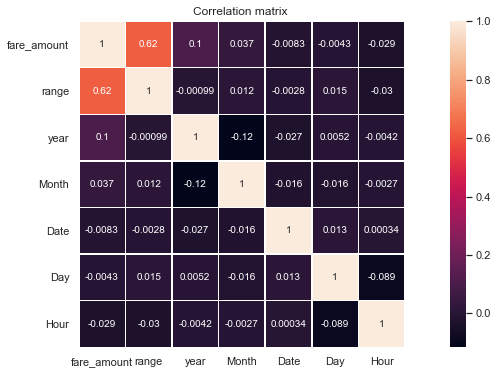

In [88]:
num_var=['fare_amount','range', 'year', 'Month', 'Date', 'Day', 'Hour']
plt.figure(figsize=(16,6))
sns.heatmap(train_data[num_var].corr(), square=True,linewidths=0.5,annot=True)
plt.title('Correlation matrix ')

In [89]:
#feature selection#
#Now we will drop the parent variables that were used to produce new & understandable variables#

train_deselect = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train_data = train_data.drop(train_deselect, axis = 1)


In [90]:
train_data.shape

(15328, 8)

In [91]:
test_deselect = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
test_data = test_data.drop(test_deselect, axis = 1) 

In [92]:
test_data.shape

(9914, 7)

In [93]:
#Feature scaling#

train_data[num_var].var()

fare_amount    110.973021
range           21.253881
year             3.496080
Month           11.886020
Date            75.441081
Day              3.880569
Hour            42.320475
dtype: float64

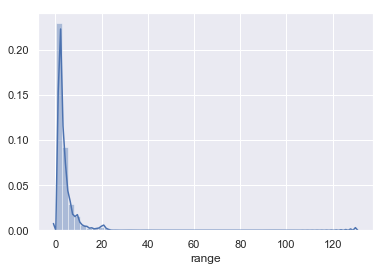

In [94]:
sns.distplot(train_data['range'],bins=50)

In [95]:
train_data['range'] = (train_data['range'] - min(train_data['range']))/(max(train_data['range']) - min(train_data['range']))
test_data['range'] = (test_data['range'] - min(test_data['range']))/(max(test_data['range']) - min(test_data['range']))

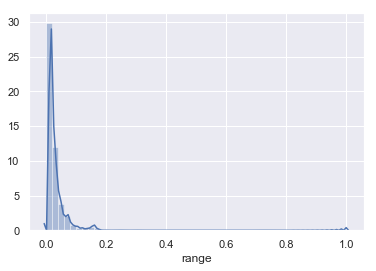

In [96]:
sns.distplot(train_data['range'],bins=50)

In [97]:
#Running ML regression#
#train test splitting#

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('fare_amount', axis=1),
train_data['fare_amount'], test_size=0.15, random_state = 123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13028, 7)
(2300, 7)
(13028,)
(2300,)


In [98]:
LRtrain_model = LinearRegression().fit(X_train , y_train)

In [99]:
#LR prediction on train data#
LRtrain_pred = LRtrain_model.predict(X_train)
print (LRtrain_pred, sep='\n')

[14.45206819  8.41160465 10.71462893 ...  8.64270108  9.99600052
 13.35299906]


In [100]:
#LR prediction on test data#
LRtest_pred = LRtrain_model.predict(X_test)
print (LRtest_pred, sep='\n')

[ 9.90406085 10.53849378  9.99962426 ...  8.41051444 20.84039493
  7.06471911]


In [101]:
#calculating RMSE for train data#
from sklearn.metrics import mean_squared_error
RMSE_LRtrain = np.sqrt(mean_squared_error(y_train, LRtrain_pred))

In [102]:
print (RMSE_LRtrain)

8.487082202321318


In [103]:
#calculating RMSE for test data#
RMSE_LRtest = np.sqrt(mean_squared_error(y_test, LRtest_pred))

In [104]:
print(RMSE_LRtest)

6.060182502550654


In [105]:
import statsmodels.api as sm


In [106]:
def MAPE (y,y_pred):
    mape = np.mean(np.abs((y-y_pred)/y))
    return mape


In [107]:
MAPE(y_train, LRtrain_pred)

0.3398222657529489

In [108]:
MAPE(y_test, LRtest_pred)

0.3361035403575705

In [109]:
import sklearn.metrics as skl

In [110]:
skl.r2_score(y_train, LRtrain_pred)

0.3794806216223916

In [111]:
skl.r2_score(y_test, LRtest_pred)

0.5520699536660523

In [112]:
#Decision Tree#
DT_Model = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [113]:
#Prediction on train data#
DTpred_train = DT_Model.predict(X_train)

In [114]:
#prediction on test data#
DTpred_test = DT_Model.predict(X_test)

In [115]:
#RMSE for train data#
RMSE_DTtrain = np.sqrt(mean_squared_error(y_train,DTpred_train))

In [116]:
#RMSE for test data#
RMSE_DTtest = np.sqrt(mean_squared_error(y_test,DTpred_test))

In [117]:
print(RMSE_DTtrain)
print(RMSE_DTtest) 

7.1660517238852535
4.459095535444328


In [118]:
MAPE(y_train,DTpred_train)

0.31408077440852067

In [119]:
MAPE(y_test,DTpred_test)

0.3104447461594597

In [120]:
skl.r2_score(y_train,DTpred_train)

0.5576170211854519

In [121]:
skl.r2_score(y_test,DTpred_test)

0.7574884970804695

In [122]:
#Random Forest#
RF_Model = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [123]:
#prediction on train data#
RFpred_train = RF_Model.predict(X_train)

In [124]:
#prediction on test data#
RFpred_test = RF_Model.predict(X_test)

In [125]:
RMSE_RFtrain = np.sqrt(mean_squared_error(y_train,RFpred_train))

In [126]:
RMSE_RFtest = np.sqrt(mean_squared_error(y_test,RFpred_test))

In [127]:
print (RMSE_RFtrain)
print (RMSE_RFtest)

2.531126161048096
3.80214771925627


In [128]:
MAPE(y_train,RFpred_train)

0.08288401920760227

In [129]:
MAPE(y_test,RFpred_test)

0.2093590408447905

In [130]:
skl.r2_score(y_train,RFpred_train)

0.9448092727550343

In [131]:
skl.r2_score(y_test,RFpred_test)

0.8236819555077476

In [132]:
#Hyper parameter tuning with Randomsearch CV#

rf = RandomForestRegressor(random_state = 45)
from pprint import pprint

#parameters used by our current forest#

print('Parameters currently in use')
pprint(rf.get_params())


Parameters currently in use
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}


In [133]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [138]:
#Random Search CV on Random Forest Model#

RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RFR = randomcv_rf.predict(X_test)

view_best_params_RFR = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RFR = best_model.predict(X_test)


#Calculating RMSE
RFR_rmse = np.sqrt(mean_squared_error(y_test,predictions_RFR))


In [139]:
print(view_best_params_RFR)
print(RFR_rmse)

{'n_estimators': 15, 'max_depth': 23}
4.359046337341404


In [140]:
#On r2 score#

RFR_r2 = skl.r2_score(y_test, predictions_RFR)
print(RFR_r2)

0.7682489235147077


In [137]:
# Grid Search CV on random Forest model#

from sklearn.model_selection import GridSearchCV    

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridscv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridscv_rf = gridscv_rf.fit(X_train,y_train)
view_best_params_GRF = gridscv_rf.best_params_

#Apply model on test data
predictions_GRF = gridscv_rf.predict(X_test)

#R2 score#

GRF_r2 = skl.r2_score(y_test, predictions_GRF)

#RMSE#
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))


print(view_best_params_GRF)
print(GRF_r2)
print(GRF_rmse)


{'max_depth': 5, 'n_estimators': 12}
0.8218275774135435
3.822089461628625


In [143]:
## Prediction of fare amount with Grid search CV
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))


grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}


gridscv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridscv_rf = gridscv_rf.fit(X_train,y_train)
view_best_params_GRF = gridscv_rf.best_params_

#Applying model on test data
predictions_GRRF = gridscv_rf.predict(X_test)

In [144]:
#Prediction of fare amount with Random search CV#

RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RFR = randomcv_rf.predict(X_test)



In [145]:
predictions_GRRF

array([ 9.17000061,  9.4255617 ,  7.52467979, ...,  9.09272808,
       25.95163572,  5.71933761])

In [146]:
predictions_RFR

array([ 8.98333333,  8.58      ,  6.83333333, ...,  9.49733333,
       29.40266667,  7.44166667])

In [147]:
test_data['Predicted_fareamount as per RSCV'] = pd.DataFrame(predictions_RFR)


In [148]:
test_data['Predicted_fareamount as per GSCV'] = pd.DataFrame(predictions_GRRF)

In [149]:
test_data.head(10)

,passenger_count,year,Month,Date,Day,Hour,range,Predicted_fareamount as per RSCV,Predicted_fareamount as per GSCV
0,1,2015,1,27,1,13,0.023234,8.983333,9.170001
1,1,2015,1,27,1,13,0.024254,8.580000,9.425562
2,1,2011,10,8,5,11,0.006187,6.833333,7.524680
3,1,2012,12,1,5,21,0.019611,11.604667,11.568615
4,1,2012,12,1,5,21,0.053875,8.820000,10.474717
5,1,2012,12,1,5,21,0.032227,14.684667,12.477718
6,1,2011,10,6,3,12,0.009296,7.946416,9.092728
7,1,2011,10,6,3,12,0.215410,30.596667,30.547804
8,1,2011,10,6,3,12,0.038741,5.601111,5.253709
9,1,2014,2,18,1,15,0.010998,8.858000,9.425562
